In [1]:
import pandas as pd
from sklearn.datasets import make_regression

In [2]:
X,y=make_regression(n_features=2,n_targets=1,n_samples=1000,noise=3)

<Axes: xlabel='0', ylabel='1'>

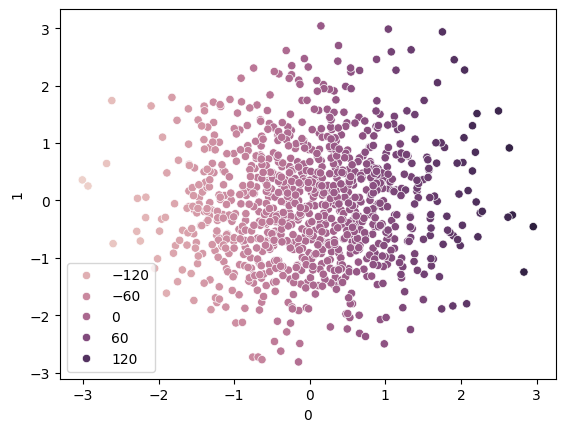

In [3]:
import seaborn as sns 
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [4]:
X

array([[-0.3671663 ,  0.58882569],
       [-0.63828102, -1.35211867],
       [-0.73419632,  0.12286704],
       ...,
       [-0.22056921, -0.59572954],
       [ 0.62090797, -1.2425256 ],
       [ 0.11569248, -0.27987816]])

In [5]:
y

array([ -21.02444995,  -44.64216835,  -43.95767167,   -8.49472722,
         30.64763395,  -40.32370383,   55.46793704,  -99.90185456,
        -27.45081764, -129.19470625,   27.65166649,   56.75942266,
        -68.07150079,  -50.22476282,  -59.21417053,   29.60384615,
         53.37152169,   10.97457729,   -9.5360089 ,  -40.02654539,
        -11.63619538,   52.54790324,  -44.25103492,    0.2070523 ,
         12.71763724,    2.14112967,   -9.11152631,   22.95063839,
        -25.76190119,   72.80072577,    6.14681223,   96.07952179,
         58.65181418,   15.35891716,   58.33637109,   70.20224061,
          0.5610837 , -129.9765026 , -102.29238276,  -44.03197118,
        -29.40566402,    4.9460034 ,   -6.91349194,  -50.15736219,
         -9.77251777,  -86.81403068,   13.02456225,   22.58970594,
         63.16996925,    1.77191284,  -19.39891778,   76.9459478 ,
        111.39860979,   11.18852308,   15.76094629,  -22.47115897,
         37.68722117,  -41.90350892,  -36.59197593,   91.45506

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
from sklearn.svm import SVR

In [8]:
regrassor = SVR(kernel= 'linear')
regrassor.fit(X_train,y_train)

SVR(kernel='linear')

In [9]:
y_pred = regrassor.predict(X_test)

In [10]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9971436119177116

# HyperParameter Tunning

In [11]:
from sklearn.model_selection import GridSearchCV
parameter={
    'kernel':['linear'],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'C':[1,0.1,10,100,1000],
    'epsilon':[0.1,0.2,0.3]
}
model = GridSearchCV(SVR(),param_grid=parameter,cv=5,verbose=10,refit=True)


In [12]:
model.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5; 1/75] START C=1, epsilon=0.1, gamma=1, kernel=linear...................
[CV 1/5; 1/75] END C=1, epsilon=0.1, gamma=1, kernel=linear;, score=0.996 total time=   0.0s
[CV 2/5; 1/75] START C=1, epsilon=0.1, gamma=1, kernel=linear...................
[CV 2/5; 1/75] END C=1, epsilon=0.1, gamma=1, kernel=linear;, score=0.998 total time=   0.0s
[CV 3/5; 1/75] START C=1, epsilon=0.1, gamma=1, kernel=linear...................
[CV 3/5; 1/75] END C=1, epsilon=0.1, gamma=1, kernel=linear;, score=0.997 total time=   0.0s
[CV 4/5; 1/75] START C=1, epsilon=0.1, gamma=1, kernel=linear...................
[CV 4/5; 1/75] END C=1, epsilon=0.1, gamma=1, kernel=linear;, score=0.997 total time=   0.0s
[CV 5/5; 1/75] START C=1, epsilon=0.1, gamma=1, kernel=linear...................
[CV 5/5; 1/75] END C=1, epsilon=0.1, gamma=1, kernel=linear;, score=0.997 total time=   0.0s
[CV 1/5; 2/75] START C=1, epsilon=0.1, gamma=0.1, kernel=linear.....

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 0.1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=10)

In [13]:
y_pred= model.predict(X_test)

In [14]:
r2_score(y_test,y_pred)

0.997177568123716

In [15]:
model.best_estimator_

SVR(C=100, gamma=1, kernel='linear')

In [24]:
model.predict([[ 6.1442, 1.5909]])

array([364.70757023])

In [21]:
y_pred

array([  11.91519407,  -51.92085042,   27.2475258 ,   11.07043291,
          9.4592265 ,    4.9106189 ,  -12.5369345 ,  -35.10119369,
         52.7016901 ,  -15.95065179,  -12.28911224,   28.69228785,
         -1.26458998,   65.19900556,   46.36906186,   62.53816317,
          5.2616497 ,   -9.96337918,  -24.23132865,   -3.03602872,
         83.50103236,  -96.25844064,   23.73400307,  -33.57636361,
        -70.97377218,  -20.42457552,   50.1808714 ,  -45.07471859,
         30.69655947,   91.60464445,  -50.74014014,  -72.21161042,
         65.25035636,   57.08554933,  -16.94019169,  -87.71126225,
         50.4009036 ,   20.59670008,   -5.53175421,   91.56188112,
         -3.9604719 ,  122.41820685,  -39.91811194,  -62.7917549 ,
        -47.40910485,  -46.10664223,  -17.81515363,  -85.86283137,
        -17.4172246 ,   75.57084071,  -44.18787448,   61.79778884,
         25.17337077,    4.34042275,    1.48677189,    8.09066757,
         -9.09255873,   31.68096613,  -85.20478567,   50.40799